# CSCA 5642 Introduction to Deep Learning Week 3 Project

## 1. Brief description of the problem and data
### 1.1 Problem description
In this project, I aim to identify and classify metastatic cancer in small image patches taken from larger digital pathology scans.
The data of this project is from 

@misc{histopathologic-cancer-detection,
    author = {Will Cukierski},
    author = {Will Cukierski},
    title = {Histopathologic Cancer Detection},
    publisher = {Kaggle},
    year = {2018},
    url = {https://kaggle.com/competitions/histopathologic-cancer-detection}
}

### 1.2 Data description
The data is composed of test and train folders containing approximately 5GB images, and a label csv file describing the label of the train dataset, namely is metastatic cancer(1) or not(0).
The training data's name is its unique ID, and the picture is unified in the same size of 96 * 96 with RGB channels.


## 2. Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data

### 2.1 Data Inspection
1) Distribution of Labels:
This count plot shows the distribution of labels (0 and 1), giving us an idea of how balanced the dataset is.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import numpy as np

In [2]:
labels = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')
# Display the distribution of labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=labels)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'

### 2.2 Data Visualization
1) sample Images:
This subplot displays a few sample images from the dataset to give a visual understanding of the image data.

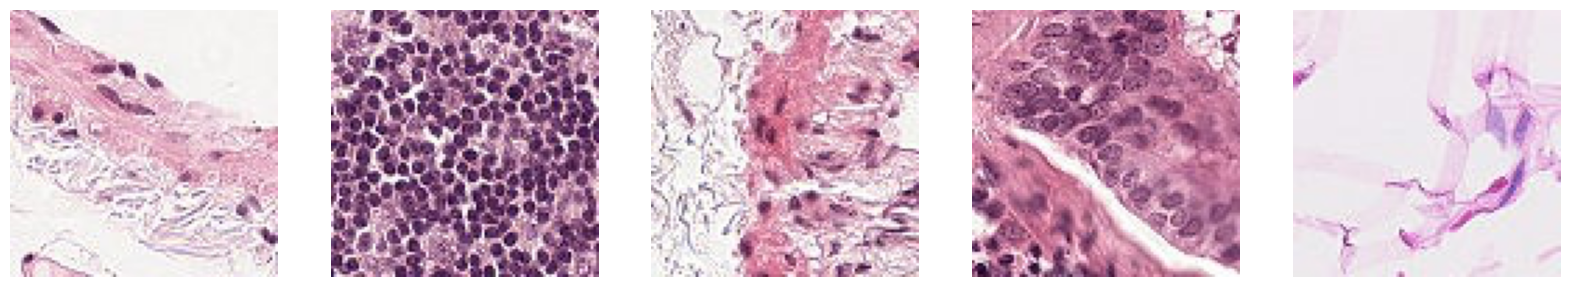

In [4]:
# Display some sample images
sample_images = labels.sample(5)['id'].values
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, img_id in enumerate(sample_images):
    img_path = os.path.join('/kaggle/input/histopathologic-cancer-detection/train/', f'{img_id}.tif')
    img = Image.open(img_path)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.show()

2) Mean and Standard Deviation of Pixel Values:
The bar plots show the mean and standard deviation of pixel values for the RGB channels in the sample images, providing insight into the color distribution and variability within the dataset.

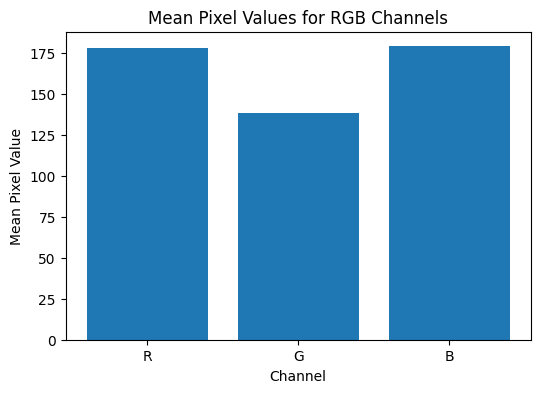

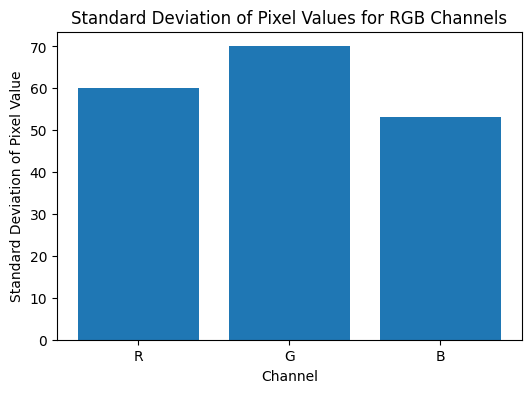

In [5]:
def load_images(image_ids, path, sample_size=100):
    images = []
    for img_id in image_ids[:sample_size]:
        img_path = os.path.join(path, f'{img_id}.tif')
        img = Image.open(img_path)
        img_array = np.array(img)
        images.append(img_array)
    return np.array(images)

sample_image_ids = labels['id'].values
images = load_images(sample_image_ids, '/kaggle/input/histopathologic-cancer-detection/train')

mean_pixel_value = np.mean(images, axis=(0, 1, 2))
std_pixel_value = np.std(images, axis=(0, 1, 2))

# Plot mean pixel values
plt.figure(figsize=(6, 4))
plt.bar(['R', 'G', 'B'], mean_pixel_value)
plt.title('Mean Pixel Values for RGB Channels')
plt.xlabel('Channel')
plt.ylabel('Mean Pixel Value')
plt.show()

# Plot standard deviation of pixel values
plt.figure(figsize=(6, 4))
plt.bar(['R', 'G', 'B'], std_pixel_value)
plt.title('Standard Deviation of Pixel Values for RGB Channels')
plt.xlabel('Channel')
plt.ylabel('Standard Deviation of Pixel Value')
plt.show()


3) Pixel Distribution:

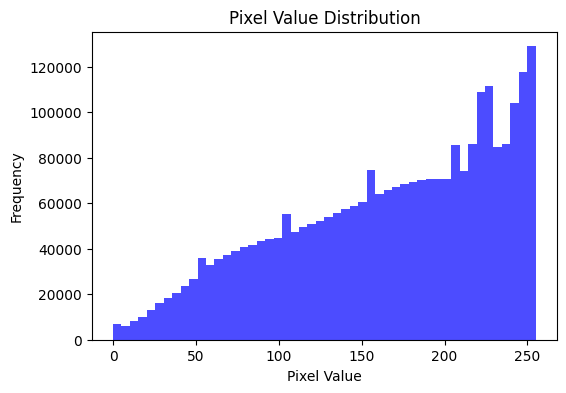

In [6]:
pixels = images.flatten()
plt.figure(figsize=(6, 4))
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

4) Filter trial

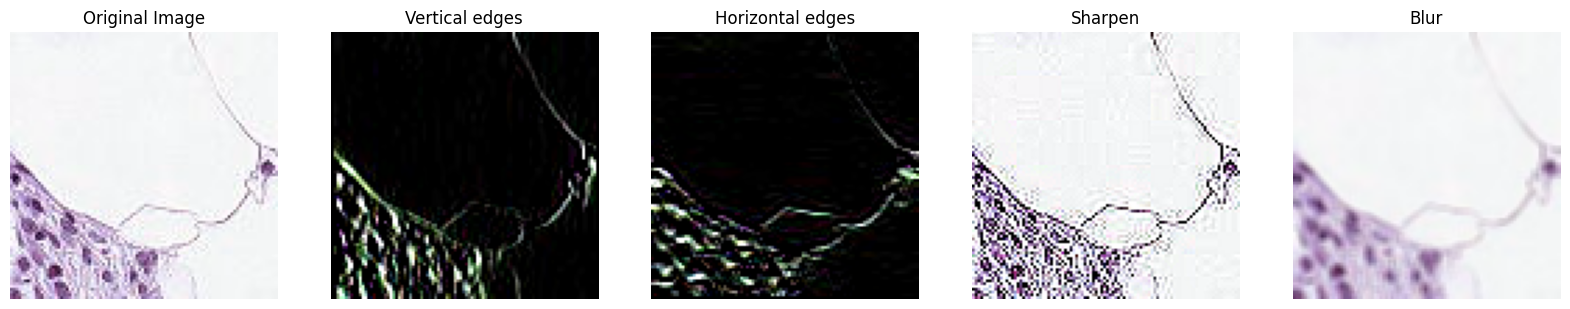

In [7]:
import cv2

# Define sample filters
filters = {
    'Vertical edges': np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]),
    'Horizontal edges': np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    'Blur': np.array([[1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9], [1 / 9, 1 / 9, 1 / 9]])
}

# Select one image
selected_image = images[0]

fig, axes = plt.subplots(1, len(filters) + 1, figsize=(20, 5))
axes[0].imshow(cv2.cvtColor(selected_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Filter and visualize
for ax, (filter_name, kernel) in zip(axes[1:], filters.items()):
    filtered_image = np.zeros_like(selected_image)
    for i in range(3):
        filtered_image[:, :, i] = cv2.filter2D(selected_image[:, :, i], -1, kernel)
    ax.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
    ax.set_title(filter_name)
    ax.axis('off')

plt.show()

### 2.3 Data Cleaning
1) Inspect if the data has null.

In [8]:
print(labels.isnull().sum())

id       0
label    0
dtype: int64


2) Inspect if the data has duplicate or invalid label out of 1 or 0.

In [9]:
duplicates = labels['id'].duplicated().sum()
if duplicates > 0:
    print(f"There are {duplicates} duplicate IDs.")
else:
    print("No duplicate IDs found.")

# Check for invalid labels
invalid_labels = labels[~labels['label'].isin([0, 1])]
if not invalid_labels.empty:
    print(f"There are {len(invalid_labels)} invalid labels.")
    print(invalid_labels)
else:
    print("All labels are valid (0 or 1).")

No duplicate IDs found.
All labels are valid (0 or 1).


2) Inspect if the label id is corresponding to the train folder's documents.

In [10]:
import os
import pandas as pd

# Get the set of IDs from the labels file
label_ids = set(labels['id'].values)

# Get the set of IDs from the train folder
train_folder = '/kaggle/input/histopathologic-cancer-detection/train'
train_ids = set([filename.split('.')[0] for filename in os.listdir(train_folder) if filename.endswith('.tif')])

# Check for missing files in the train folder
missing_files = label_ids - train_ids
if missing_files:
    print(f"There are {len(missing_files)} files listed in labels.csv but not found in the train folder.")
    print(missing_files)
else:
    print("All label IDs have corresponding files in the train folder.")

All label IDs have corresponding files in the train folder.


## 3. DModel Architecture

### 3.1 Data Preprocessing
First check if GPU is available in tf.

In [11]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2024-06-15 12:51:48.483838: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 12:51:48.483930: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 12:51:48.596248: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Num GPUs Available:  1


VGG16 and ResNet50 are advanced convolutional neural network architectures known for their strong performance in image recognition, making them suitable for cancer detection tasks.

VGG16 Architecture
1) Architecture: Comprises 16 layers with 13 convolutional layers and 3 fully connected layers. It uses 3x3 convolutional filters with "same" padding, ensuring image dimensions remain constant. Max pooling layers follow every few convolutional layers to reduce dimensionality and enhance feature extraction.

2) Features: The simplicity and uniformity of VGG16 make it highly effective for capturing local features in images, a critical aspect in analyzing medical images where details are vital.

ResNet50 Architecture
1) Architecture: Features 50 layers, including identity shortcut connections that help learn residuals between inputs and outputs, solving vanishing gradients in deep networks.

2) Features: ResNet50's skip connections allow for deeper network training without loss of performance, crucial for learning complex patterns necessary for medical diagnosis like cancer detection.

Suitability for Cancer Detection
1) Feature Learning: Both architectures excel in extracting complex features from medical images, which is essential for identifying cancerous cells and anomalies.
2) Transferable Learning: Leveraging pretrained models on ImageNet for cancer detection minimizes training time and data needs through transfer learning.
3) Proven Effectiveness: Their extensive validation across various tasks ensures reliability and accuracy in medical image analysis.

VGG16 and ResNet50's capabilities in deep feature extraction and handling of intricate image patterns make them excellent choices for the demanding precision required in cancer detection tasks.

Next, I will transfer two models to generate our own models, and compare their performance.
First, I should customize the data generator to meet the format of out input data, rewriting several method to fit the customized formation.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
class CustomDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df, image_dir, batch_size, target_size, shuffle=True, validation_split=0.2, subset='training', **kwargs):
        super().__init__(**kwargs) 
        self.df = df
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.validation_split = validation_split
        self.subset = subset
        self.train_df, self.val_df = self.split_data()
        self.on_epoch_end()
    
    def split_data(self):
        df_len = len(self.df)
        indices = np.arange(df_len)
        np.random.shuffle(indices)
        split = int(df_len * (1 - self.validation_split))
        train_indices = indices[:split]
        val_indices = indices[split:]
        train_df = self.df.iloc[train_indices]
        val_df = self.df.iloc[val_indices]
        if self.subset == 'training':
            return train_df, val_df
        else:
            return val_df, train_df
    
    def __len__(self):
        if self.subset == 'training':
            return len(self.train_df) // self.batch_size
        else:
            return len(self.val_df) // self.batch_size
    
    def __getitem__(self, index):
        if self.subset == 'training':
            df = self.train_df
        else:
            df = self.val_df
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = df.iloc[indices]
        images = np.array([self.load_and_preprocess_image(os.path.join(self.image_dir, f"{img_id}.tif")) for img_id in batch_df['id']])
        labels = batch_df['label'].values
        return images, labels
    
    def on_epoch_end(self):
        if self.subset == 'training':
            self.indices = np.arange(len(self.train_df))
        else:
            self.indices = np.arange(len(self.val_df))
        if self.shuffle:
            np.random.shuffle(self.indices)
    
    def load_and_preprocess_image(self, img_path):
        img = image.load_img(img_path, target_size=self.target_size)
        img_array = image.img_to_array(img)
        img_preprocessed = preprocess_input(img_array)
        return img_preprocessed

Next, I will construct the complete model, freeze all the layers of the original ResNet50 model, so they do not get updated during training. Then, I will compile the model with SGD optimizer and print the model summary.

In [4]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global average pooling layer
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Construct the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all the layers of the original ResNet50 model so they do not get updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.0025, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 102, 102,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 48, 48,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 48, 48,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 48, 48,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 50, 50,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 24, 24,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 24, 24,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 24, 24,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 24, 24,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 24, 24,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 24, 24,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 24, 24,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 24, 24,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 24, 24,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 24, 24,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 24, 24,    │      1,024 │ conv2_block1_3_c

 Total params: 25,686,913 (97.99 MB)

 Trainable params: 2,099,201 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

The training process is time-consuming even though I implement transfer model. So I only make epoch equals to 10, to check the performance of each model.

In [ ]:
image_directory = '/kaggle/input/histopathologic-cancer-detection/train'
batch_size = 50
target_size = (96, 96)
labels = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')
train_generator = CustomDataGenerator(labels, image_directory, batch_size, target_size, shuffle=True, subset='training')
validation_generator = CustomDataGenerator(labels, image_directory, batch_size, target_size, shuffle=False, subset='validation')

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Epoch 1/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 5232s 1s/step - accuracy: 0.8590 - loss: 0.3323 - val_accuracy: 0.8867 - val_loss: 0.2692
Epoch 2/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 5074s 1s/step - accuracy: 0.8950 - loss: 0.2542 - val_accuracy: 0.9030 - val_loss: 0.2350
Epoch 3/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 5158s 1s/step - accuracy: 0.9047 - loss: 0.2315 - val_accuracy: 0.9039 - val_loss: 0.2313
Epoch 4/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 5368s 2s/step - accuracy: 0.9135 - loss: 0.2124 - val_accuracy: 0.9195 - val_loss: 0.2012
Epoch 5/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 5953s 2s/step - accuracy: 0.9188 - loss: 0.2020 - val_accuracy: 0.9230 - val_loss: 0.1930
Epoch 6/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.9244 - loss: 0.1889

In [ ]:
import pickle
model.save('/kaggle/working/ResNet50.h5')

with open('/kaggle/working/ResNet50.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
# Load the pre-trained VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Add a global average pooling layer
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(1, activation='sigmoid')(x)  # Output layer for binary classification

# Construct the complete model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all the layers of the original VGG16 model so they do not get updated during training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model with SGD optimizer
optimizer = SGD(learning_rate=0.0025, momentum=0.9)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 96, 96, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 96, 96, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 48, 48, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 48, 48, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 12, 12, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,241,025 (58.14 MB)

 Trainable params: 526,337 (2.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
   1/3520 ━━━━━━━━━━━━━━━━━━━━ 4:56:19 5s/step - accuracy: 0.3600 - loss: 7.3219

W0000 00:00:1718468231.703602      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3520/3520 ━━━━━━━━━━━━━━━━━━━━ 1906s 540ms/step - accuracy: 0.8095 - loss: 0.8307 - val_accuracy: 0.8488 - val_loss: 0.3469
Epoch 2/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 659s 187ms/step - accuracy: 0.8509 - loss: 0.3415 - val_accuracy: 0.8609 - val_loss: 0.3226
Epoch 3/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 614s 174ms/step - accuracy: 0.8627 - loss: 0.3205 - val_accuracy: 0.8617 - val_loss: 0.3183
Epoch 4/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 631s 179ms/step - accuracy: 0.8690 - loss: 0.3027 - val_accuracy: 0.8749 - val_loss: 0.2934
Epoch 5/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 689s 196ms/step - accuracy: 0.8735 - loss: 0.2970 - val_accuracy: 0.8796 - val_loss: 0.2842
Epoch 6/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 674s 191ms/step - accuracy: 0.8786 - loss: 0.2841 - val_accuracy: 0.8826 - val_loss: 0.2761
Epoch 7/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 708s 201ms/step - accuracy: 0.8825 - loss: 0.2758 - val_accuracy: 0.8845 - val_loss: 0.2727
Epoch 8/10
3520/3520 ━━━━━━━━━━━━━━━━━━━━ 707s 201ms/step - accuracy: 0.

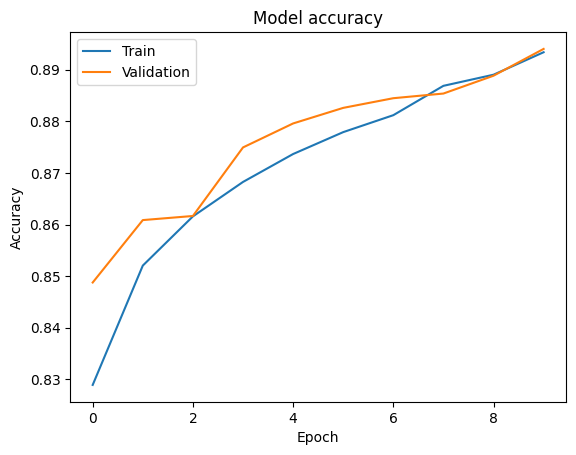

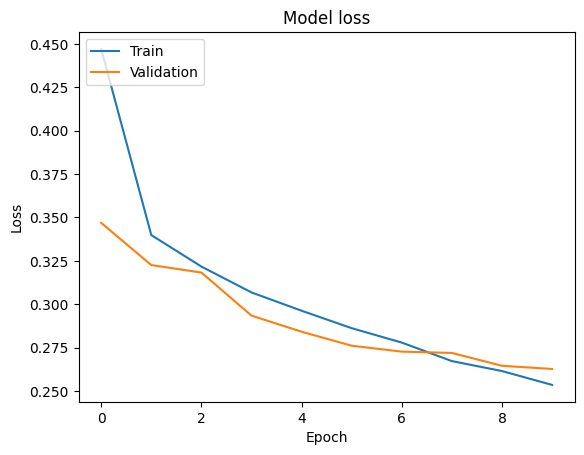

In [8]:
# Data preparation using CustomDataGenerator
image_directory = '/kaggle/input/histopathologic-cancer-detection/train'
batch_size = 50
target_size = (96, 96)
labels = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')

train_generator = CustomDataGenerator(labels, image_directory, batch_size, target_size, shuffle=True, subset='training')
validation_generator = CustomDataGenerator(labels, image_directory, batch_size, target_size, shuffle=False, subset='validation')

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
import pickle
model.save('/kaggle/working/VGG16.h5')

with open('/kaggle/working/VGG16.pkl', 'wb') as file:
    pickle.dump(history.history, file)

Based on the result above, I learn that the ResNet50 model performs little better than VGG16 model. And it seems convergence when Epoch is increasing. Due to calculation capacity limitation, I stop in the number of 10 epoch. But I can assume that when epoch increase, the accuracy and loss with become stable, or even overfitting. Therefore, I assume that epoch 10 is proper in model fitting.

Next, I will utilize RandomSearch module to search better hyperparamter combination.

Random Search is a hyperparameter optimization technique used in machine learning. It randomly samples the parameter space and evaluates sets of parameters to find the best solution. Unlike grid search which exhaustively tests all possible combinations, Random Search has a higher chance of finding a good solution with fewer trials, as it doesn't require testing every possible combination. This method is especially effective when dealing with high-dimensional data or when the optimal hyperparameters are unknown. Random Search can be more efficient in terms of computational cost and time, especially in scenarios where some hyperparameters do not influence the performance significantly.

First I define my Hyper Model class to customize build method.

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel

class MyHyperModel(HyperModel):
    def __init__(self, base_model):
        self.base_model = base_model

    def build(self, hp):
        if self.base_model == 'VGG16':
            base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
        elif self.base_model == 'ResNet50':
            base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

        # Freezing the base model layers
        for layer in base_model.layers:
            layer.trainable = False

        x = GlobalAveragePooling2D()(base_model.output)
        x = Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu')(x)
        x = Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))(x)
        predictions = Dense(1, activation='sigmoid')(x)

        model = Model(inputs=base_model.input, outputs=predictions)
        model.compile(optimizer=Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

In [ ]:
from keras_tuner import RandomSearch
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
image_directory = '/kaggle/input/histopathologic-cancer-detection/train'
batch_size = 50
target_size = (96, 96)
labels = pd.read_csv('/kaggle/input/histopathologic-cancer-detection/train_labels.csv')

train_generator = CustomDataGenerator(labels, image_directory, batch_size, target_size, shuffle=True, subset='training')
validation_generator = CustomDataGenerator(labels, image_directory, batch_size, target_size, shuffle=False, subset='validation')

def tuner_setup(model_name):
    tuner = RandomSearch(
        MyHyperModel(base_model=model_name),
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=2,
        directory='hyperparameter_tuning',
        project_name=f'{model_name}_tuning')

    return tuner

def run_tuning(tuner, epochs=5):
    tuner.search(train_generator,
                 validation_data=validation_generator,
                 epochs=epochs,
                 callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])
    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model, tuner


After defining several essential variables and function above, I then implement tuning process. 

In [ ]:
resnet_tuner = tuner_setup('ResNet50')
best_resnet, resnet_tuner = run_tuning(resnet_tuner)
best_resnet.save('/kaggle/working/best_resnet.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_history(tuner):
    for trial in tuner.oracle.get_best_trials(num_trials=5):
        for metric in ['accuracy', 'loss']:
            plt.figure()
            for execution in trial.executions:
                history = execution.history
                plt.plot(history[metric])
                plt.plot(history['val_' + metric])
                plt.title(f'Best Trial {metric.capitalize()}')
                plt.ylabel(metric.capitalize())
                plt.xlabel('Epoch')
                plt.legend(['Train', 'Validation'], loc='upper left')
            plt.show()

plot_history(resnet_tuner)

This process is time-consuming, so I cannot make the parameter of max_trials and executions_per_trial too large. I accomplish it online because I have no proper device to implement it. After this process, I can download the best_resnet saved, and I will try to predict our test dataset and submit to kaggle to learn our tuned model's performance.

## 4. Results and Analysis 

In [ ]:
df = pd.read_excel('data/sample_submission.xlsx')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_id):
    img_path = f'data/test/{img_id}.jpg'
    img = image.load_img(img_path, target_size=(96, 96)) 
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

df['image_array'] = df['id'].apply(lambda x: load_and_preprocess_image(x))

In [ ]:
predictions = model.predict(np.vstack(df['image_array'].values))
df['label'] = predictions.argmax(axis=1)

In [ ]:
df[['id', 'label']].to_excel('/path/to/your/updated_excel_file.xlsx', index=False)

## 5. Conclusion